In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq
import glob as glob
from matplotlib.image import imread


Mediciones cada 500 iteraciones

# Principal Component Analysis (PCA)

* Based on the SVD
* Pre process data
    * Mean substraction and set variance to unity before SVD
    * Calcula el promedio de todas las columnas y se lo sustraes a X
    

Text(0, 0.5, 'Drag$^\\ast$  [-]')

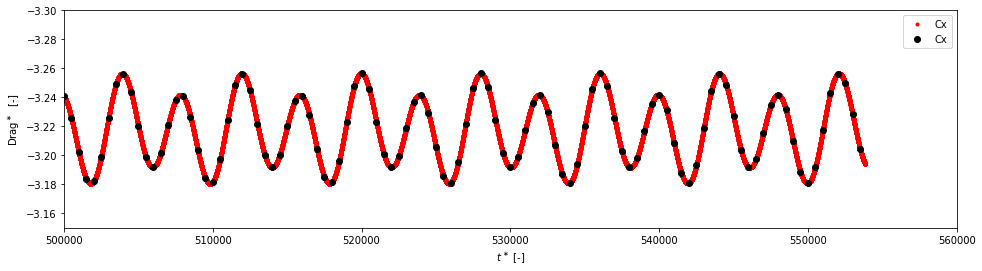

In [31]:
fig, ax  = plt.subplots(figsize=(16,4))
ax.plot(r.Cx,'r.',label='Cx')
ax.plot(R.Cx,'ko',label='Cx')
ax.set_xlim(500_000,560_000)
ax.set_ylim(-3.15,-3.3)
ax.legend()


ax.set_xlabel('$t^\\ast$ [-]')
ax.set_ylabel('Drag$^\\ast$  [-]')

In [16]:
imagenes = glob.glob('../figs/obstacle/*.png')
imagenes.sort()
matriz = []
for imagen in imagenes:
    tmp = imread(imagen)
    tmp_bw = np.mean(tmp,-1)
    tmp_bw = tmp_bw.flatten()
#     print(tmp_bw.shape)
    matriz.append(tmp_bw)
matriz = np.array(matriz)
matriz = matriz.T

(4291200,)
(4291200,)
(4291200,)
(4291200,)
(4291200,)
(4291200,)
(4291200,)
(4291200,)
(4291200,)
(4291200,)
(4291200,)
(4291200,)
(4291200,)
(4291200,)
(4291200,)
(4291200,)
(4291200,)
(4291200,)
(4291200,)
(4291200,)


In [8]:
matriz.shape

(4291200, 20)

In [13]:
promedio =  np.mean(matriz,axis=1)
promedio.shape

(4291200,)

In [17]:
imagenes = glob.glob('../figs/obstacle/*.png')
imagenes.sort()
matriz = []
for imagen in imagenes:
    tmp = imread(imagen)
    tmp_bw = np.mean(tmp,-1)
    tmp_bw = tmp_bw.flatten()
    tmp_bw = tmp_bw - promedio
    matriz.append(tmp_bw)
matriz = np.array(matriz)
matriz = matriz.T

In [18]:
U, S, VT = np.linalg.svd(matriz,full_matrices=False)
S = np.diag(S)

In [19]:
U.shape

(4291200, 20)

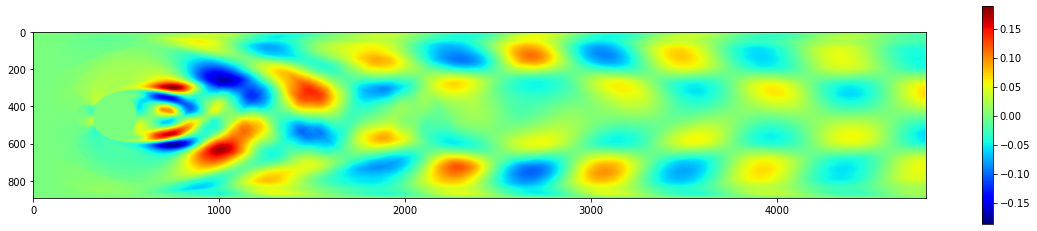

In [22]:
r = 1
Xapprox = U[:,:r] @ S[:r,:r] @ VT[:r,:]
fig, ax = plt.subplots(figsize=(20,4))
img = ax.imshow(Xapprox[:,0].reshape(894, 4800),cmap='jet')
fig.colorbar(img)

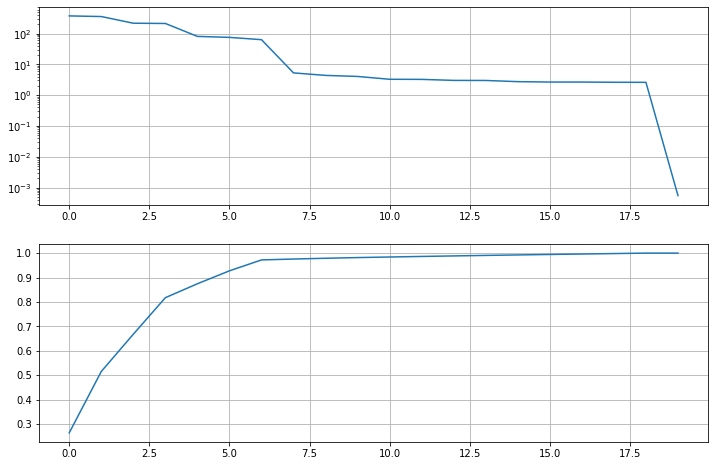

In [23]:
fig, ax = plt.subplots(2,figsize=(12,8))

ax[0].semilogy(np.diag(S))

ax[1].plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))


for i in range(2):
    ax[i].grid()

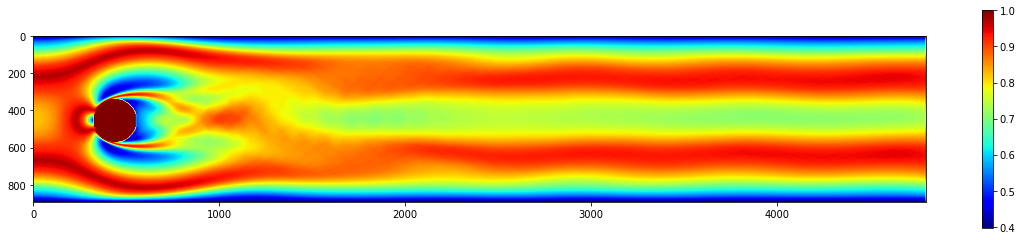

In [32]:
fig, ax = plt.subplots(figsize=(20,4))
img = ax.imshow(promedio.reshape(894, 4800),cmap='jet')
fig.colorbar(img)

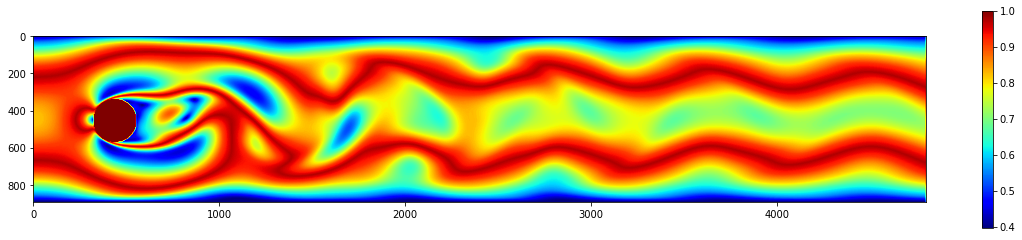

In [36]:
fig, ax = plt.subplots(figsize=(20,4))
r = 7
Xapprox = U[:,:r] @ S[:r,:r] @ VT[:r,:]

img = ax.imshow(promedio.reshape(894, 4800)+Xapprox[:,0].reshape(894,4800),cmap='jet')
fig.colorbar(img)

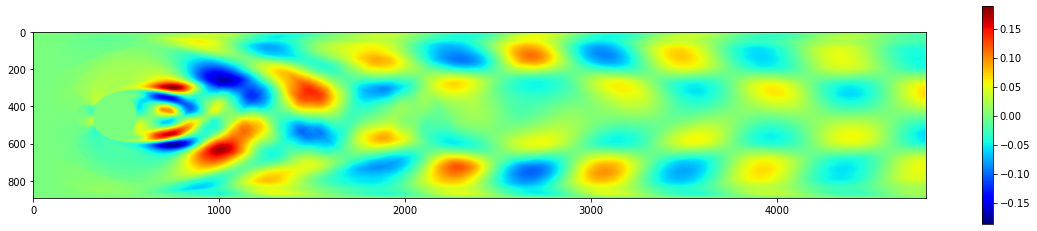

In [26]:
r = 1
Xapprox = U[:,r-1:r] @ S[r-1:r,r-1:r] @ VT[r-1:r,:]
fig, ax = plt.subplots(figsize=(20,4))
img = ax.imshow(Xapprox[:,0].reshape(894, 4800),cmap='jet')
fig.colorbar(img)

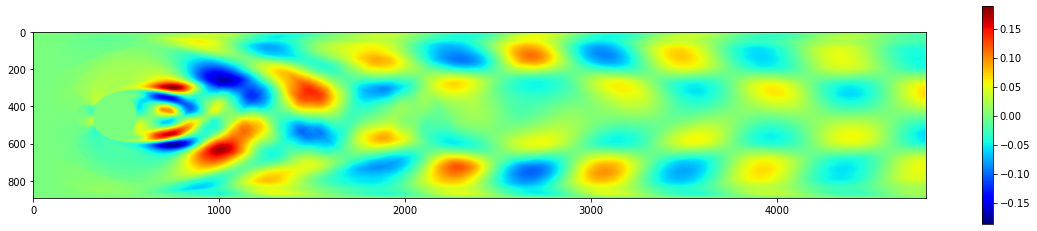

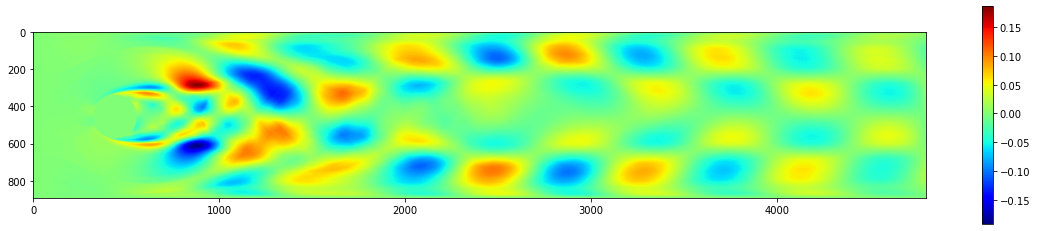

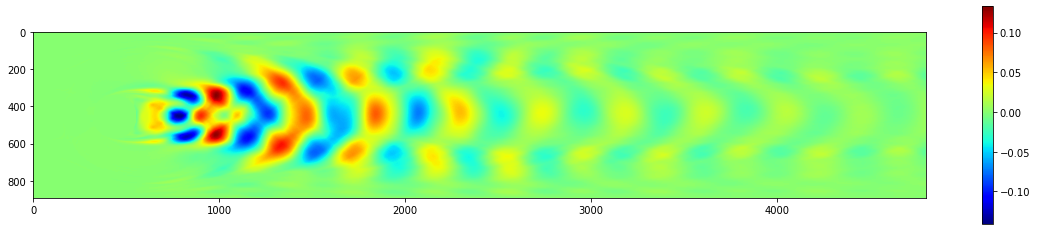

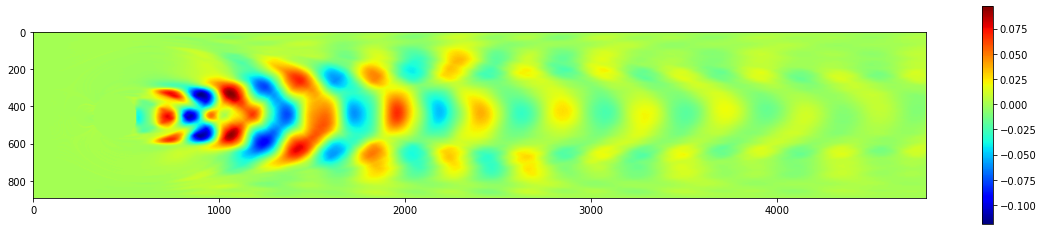

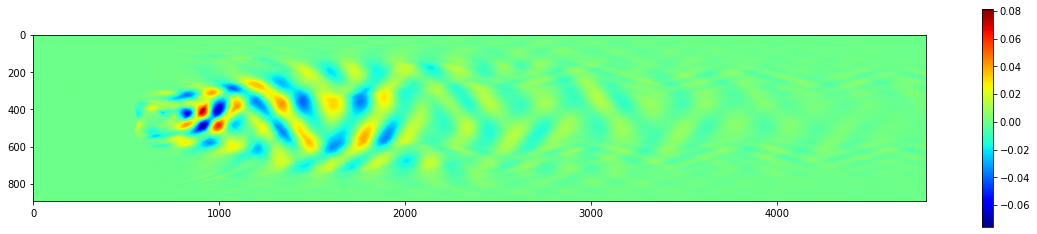

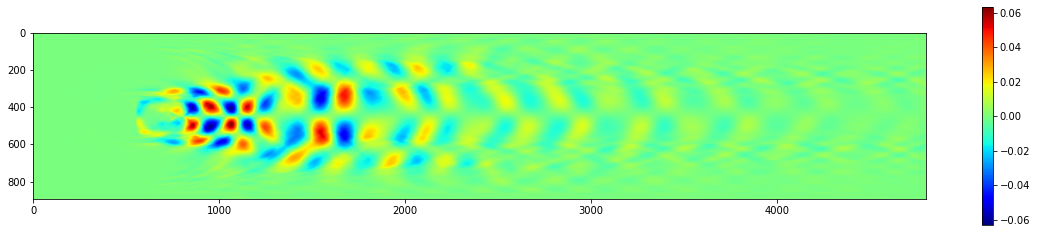

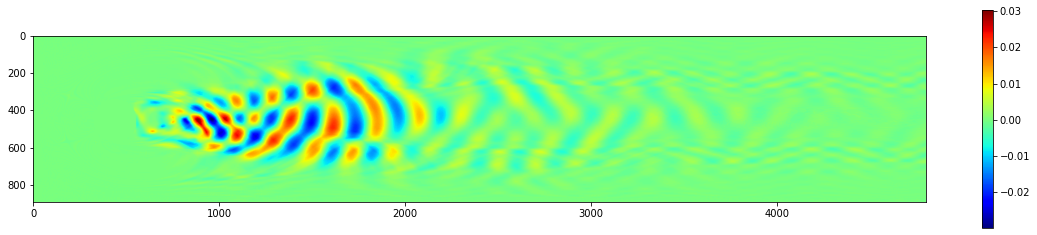

In [31]:
for r in range(1,8):
    Xapprox = U[:,r-1:r] @ S[r-1:r,r-1:r] @ VT[r-1:r,:]
    fig, ax = plt.subplots(figsize=(20,4))
    img = ax.imshow(Xapprox[:,0].reshape(894, 4800),cmap='jet')
    fig.colorbar(img)

In [ ]:
fig, ax = plt.subplots(figsize=(20,4))
img = ax.imshow(promedio.reshape(894, 4800),cmap='jet')
fig.colorbar(img)